# Raw data

In [1]:
ls ../data/raw

Gali_2008_chapter_2_raw.csv


In [2]:
import pandas as pd

raw_data = pd.read_csv("../data/raw/Gali_2008_chapter_2_raw.csv")
raw_data.head()

Consumption  Real Wage  Inflation  AR(1) Technology Process  Hours Worked  \
0     0.874450   0.715768   1.000000                  1.000000      0.818535   
1     0.213111   0.174439   1.337372                  0.243708      0.818535   
2     0.746075   0.610688  -0.249530                  0.853193      0.818535   
3     0.149267   0.122180   1.358784                  0.170698      0.818535   
4    -0.239937  -0.196397   0.682073                 -0.274387      0.818535   

   Nominal Interest Rate  Real Interest Rate    Output  Money Growth  
0               1.010101            1.010101  0.874450      0.000000  
1               1.201084            1.086494  0.213111     -4.700847  
2               1.047173            1.024930  0.746075     -0.122244  
3               1.219521            1.093869  0.149267     -4.024820  
4               1.331916            1.138827 -0.239937     -4.832386

# Processed data

In [3]:
ls ../data/processed

Gali_2008_chapter_2.pkl


In [4]:
import pickle

with open("../data/processed/Gali_2008_chapter_2.pkl", "rb") as f:
    processed_data = pickle.load(f)

In [5]:
transitions = processed_data["transitions"]
transitions.head()

state                  action  \
0  [0.8744501546700187, 0.7157682997392529, 1.0, ...   [0.19098273087813422]   
1  [0.2131108355894982, 0.1744387368808553, 1.337...  [-0.15391024621022087]   
2  [0.7460747164606565, 0.6106884748405184, -0.24...    [0.1723471383274502]   
3  [0.1492671486618573, 0.122180426904883, 1.3587...     [0.112395167594465]   
4  [-0.2399373792192278, -0.1963972092067919, 0.6...  [-0.36368702181026547]   

                                          next_state     reward  truncated  \
0  [0.2131108355894982, 0.1744387368808553, 1.337...  -6.978620      False   
1  [0.7460747164606565, 0.6106884748405184, -0.24...  -7.729246      False   
2  [0.1492671486618573, 0.122180426904883, 1.3587...  -7.261952      False   
3  [-0.2399373792192278, -0.1963972092067919, 0.6...  -2.626222      False   
4  [1.0194462637756925, 0.8344527300971373, 1.661... -23.672029      False   

                                               info  
0  {'AR(1) Technology Process': 0.2437083857225886}  
1  {'AR(1) Technology Process': 0.8531929607150608}  
2  {'AR(1) Technology Process': 0.1706982929383602}  
3  {'AR(1) Technology Process': -0.274386570735722}  
4  {'AR(1) Technology Process': 1.1658140356329272}

# Dynamics from processed data (a.k.a RL transitions)

In [6]:
import hydra
from lib.plots import plot_state_steps, plot_action_steps

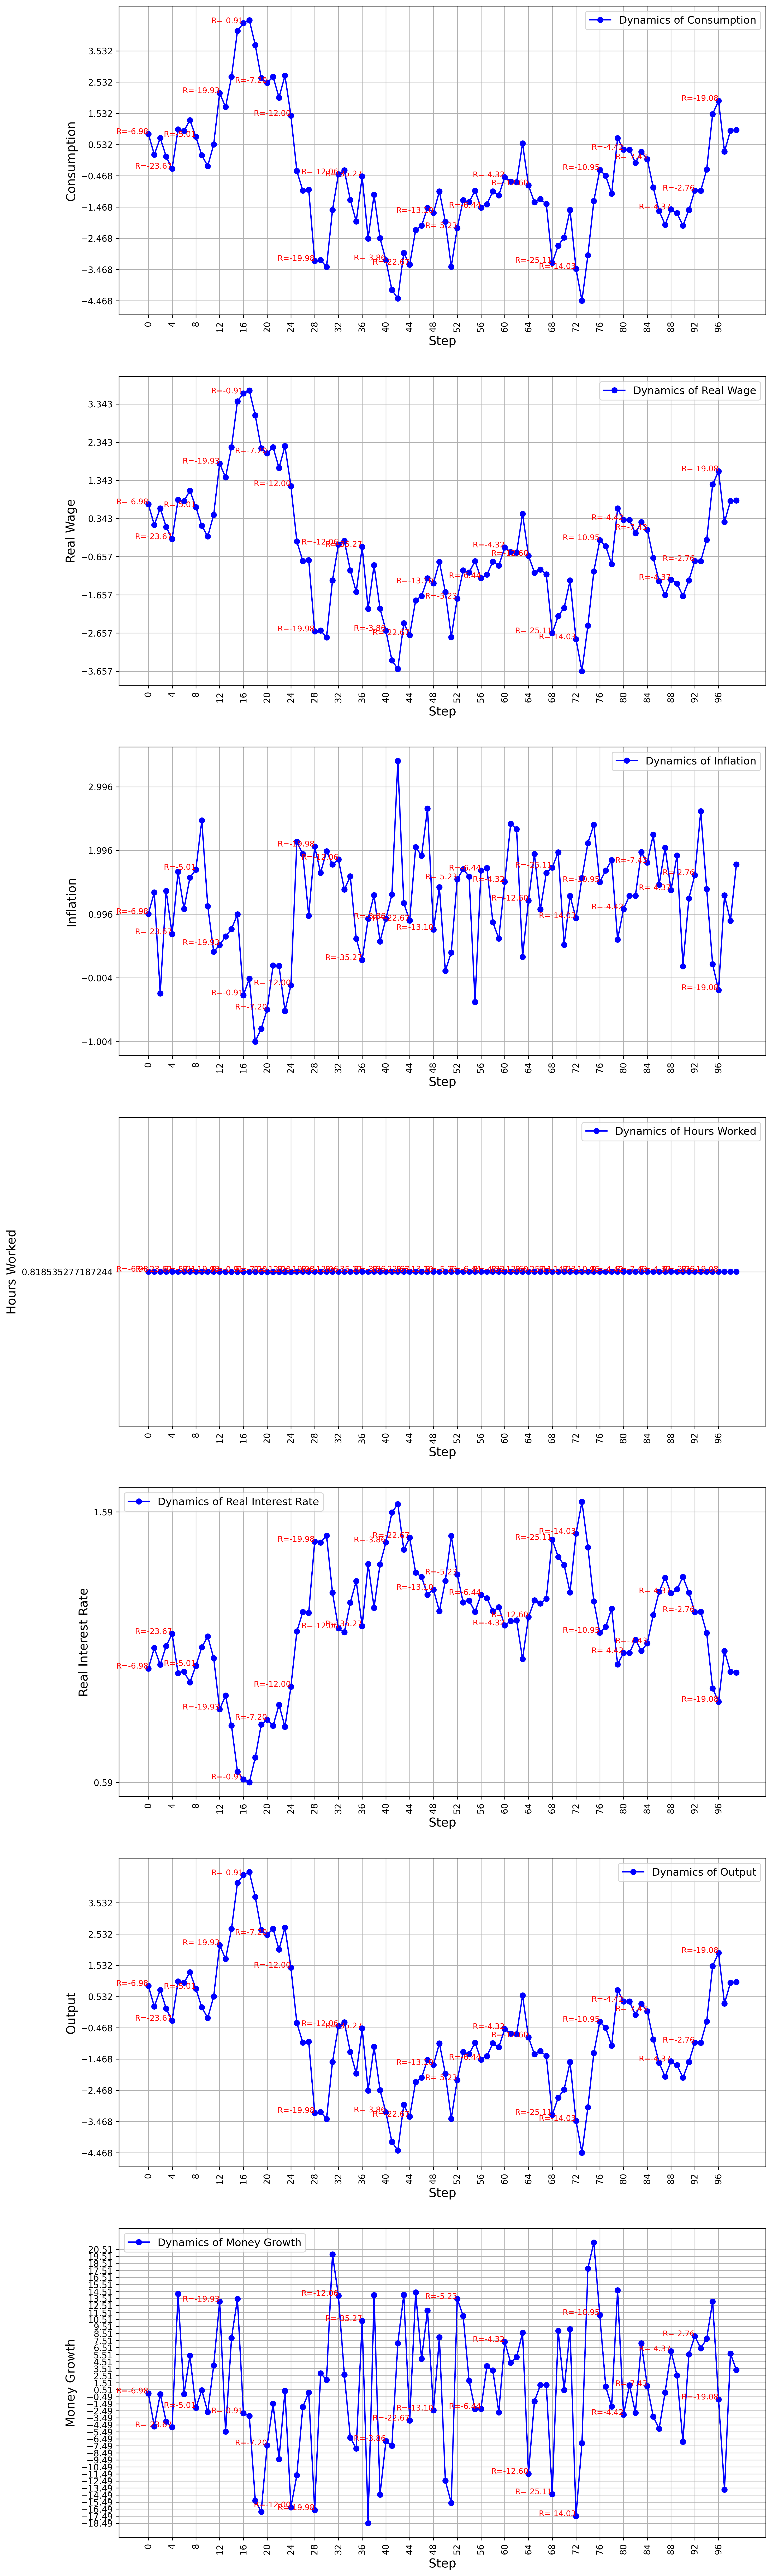

In [7]:
config_path = "../conf/dynare/"
config_name = "config"

with hydra.initialize(version_base=None, config_path=config_path):
    config = hydra.compose(config_name=config_name)

plot_state_steps(transitions, config.Gali_2008_chapter_2)

## Validation: Dynamics from raw data

In [8]:
import matplotlib.pyplot as plt
import numpy as np

columns = raw_data.columns

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(13.33, 7.5 * len(columns)), dpi=300)

for idx, column in enumerate(columns):
    
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    # for i in range(0, len(steps), 4):
    #     ax.text(steps[i], column_values[i], f"R={rewards[i]:.2f}", fontsize=9, color='red', ha='right')
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)


## Looks Good To Me

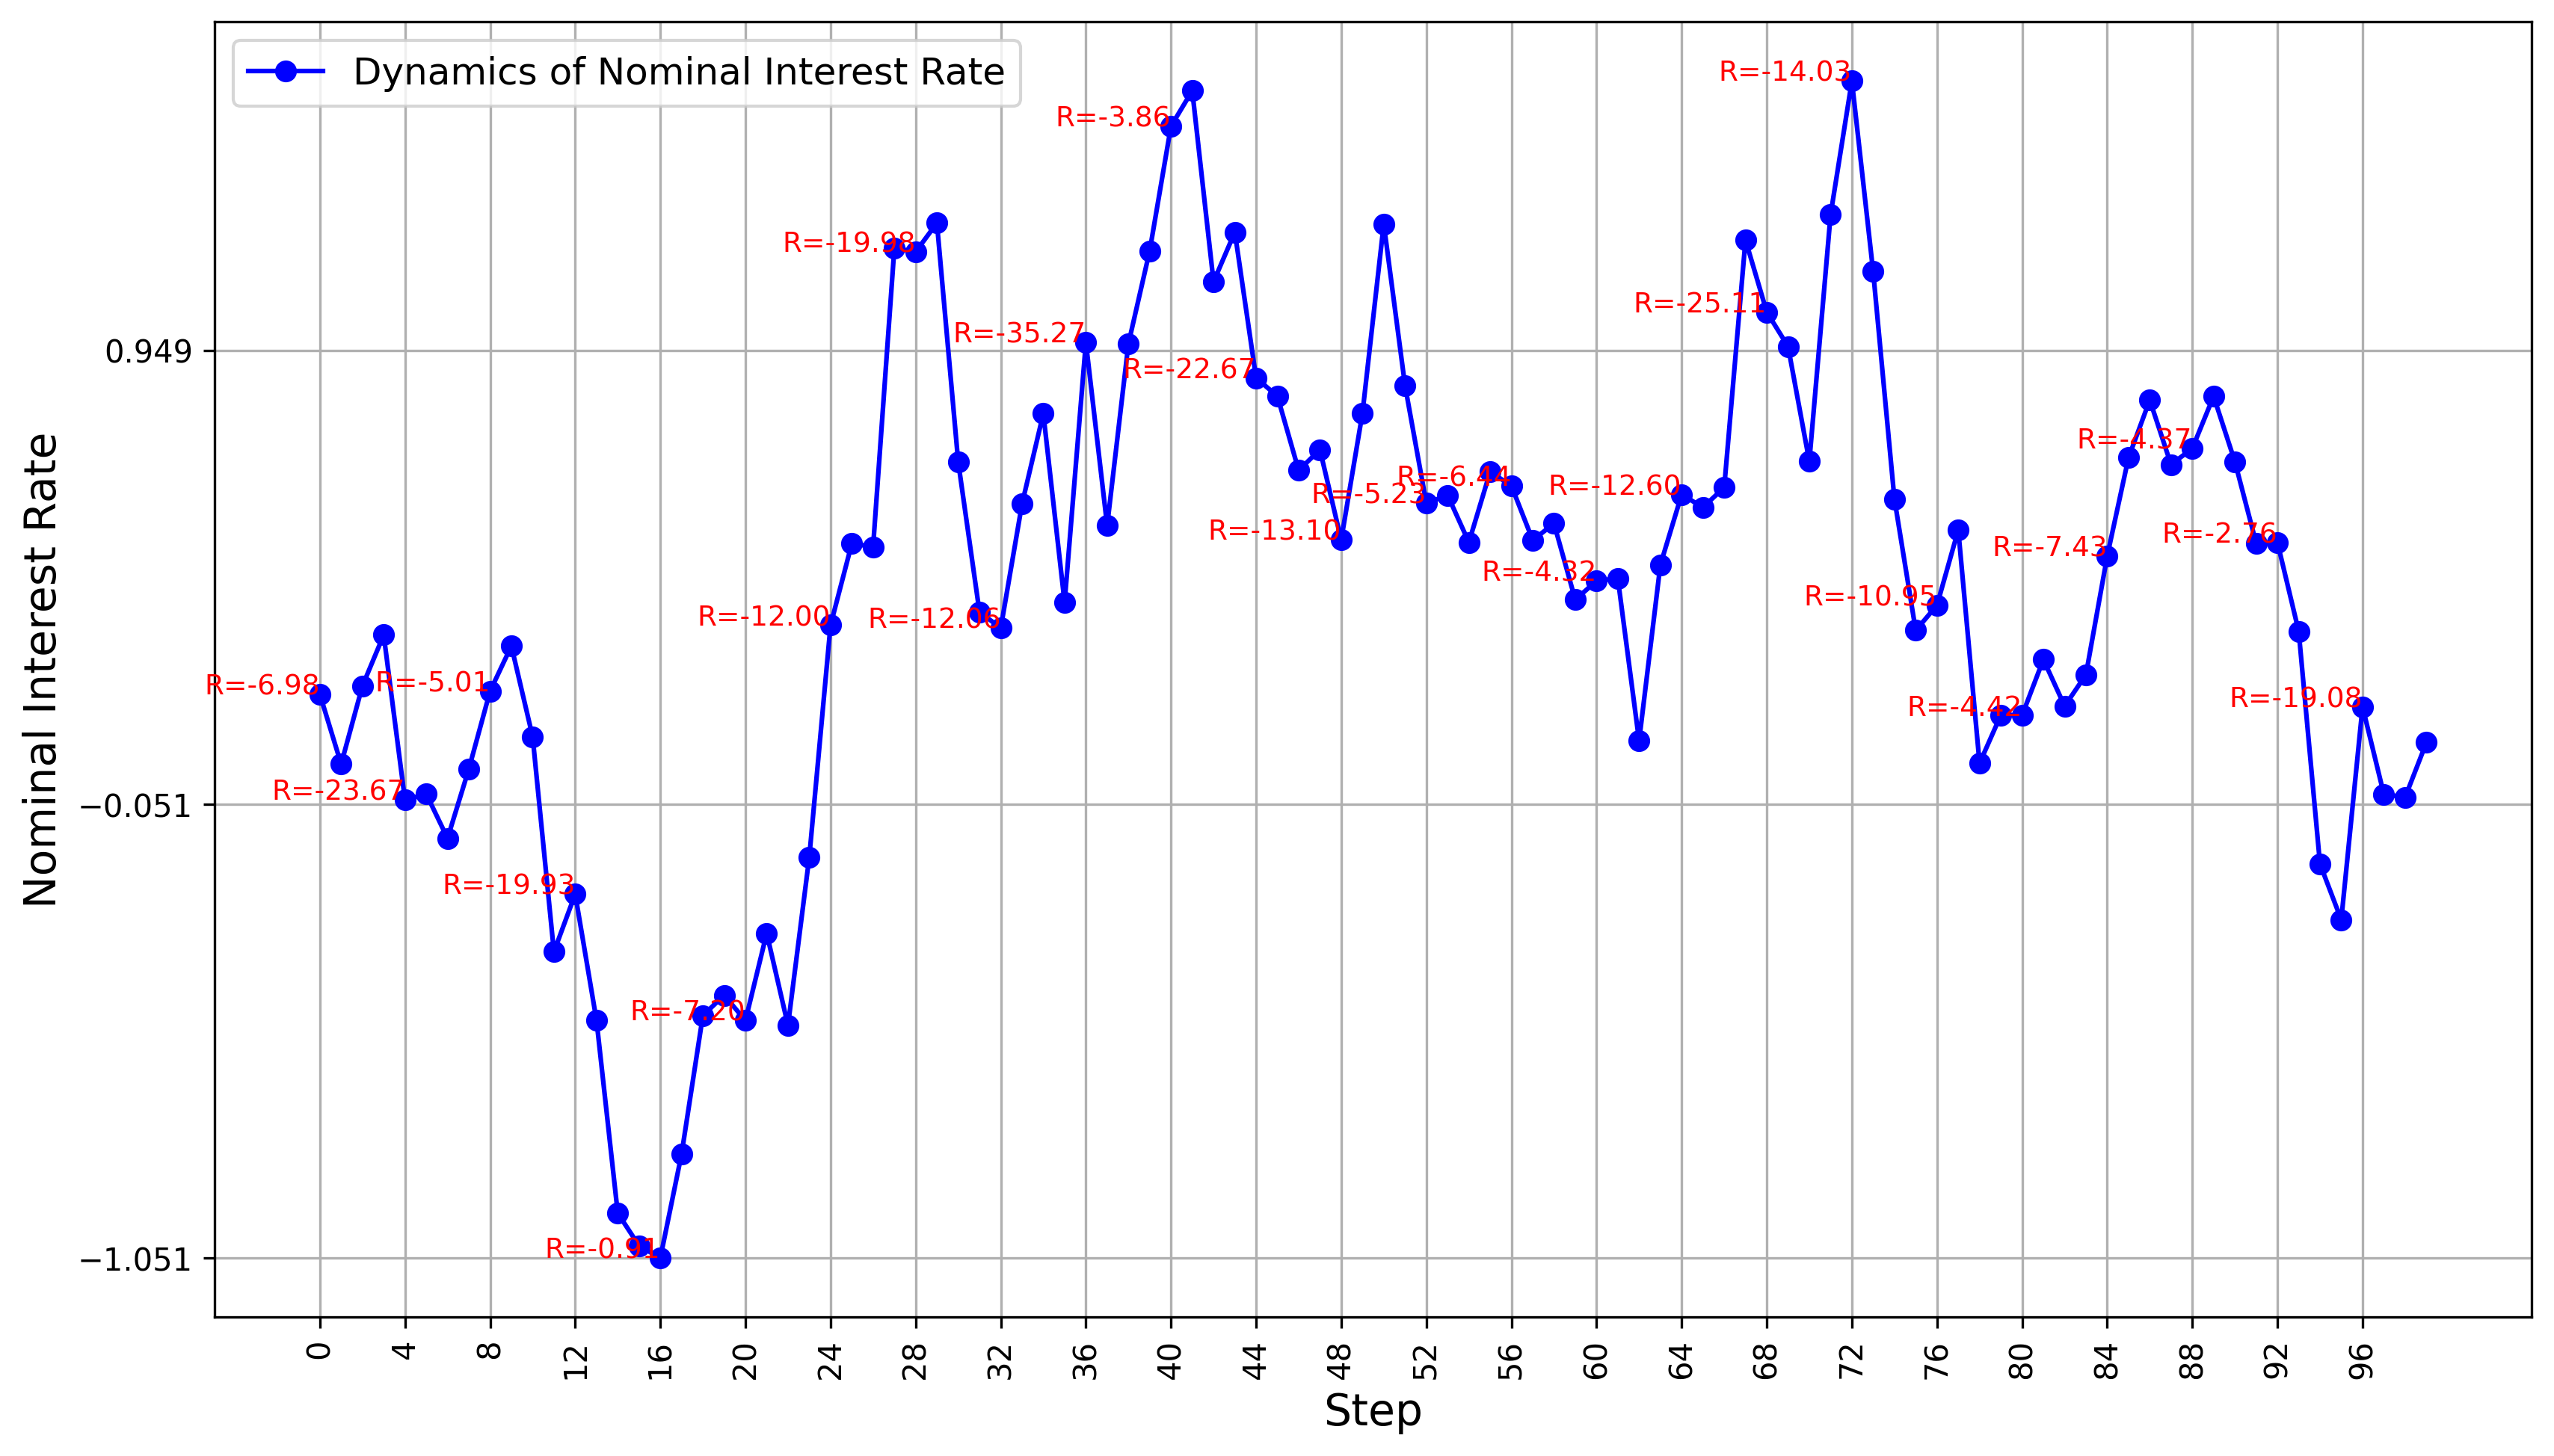

In [9]:
config_path = "../conf/dynare/"
config_name = "config"

with hydra.initialize(version_base=None, config_path=config_path):
    config = hydra.compose(config_name=config_name)

plot_action_steps(transitions, config.Gali_2008_chapter_2)

## Validation: Dynamics from raw data

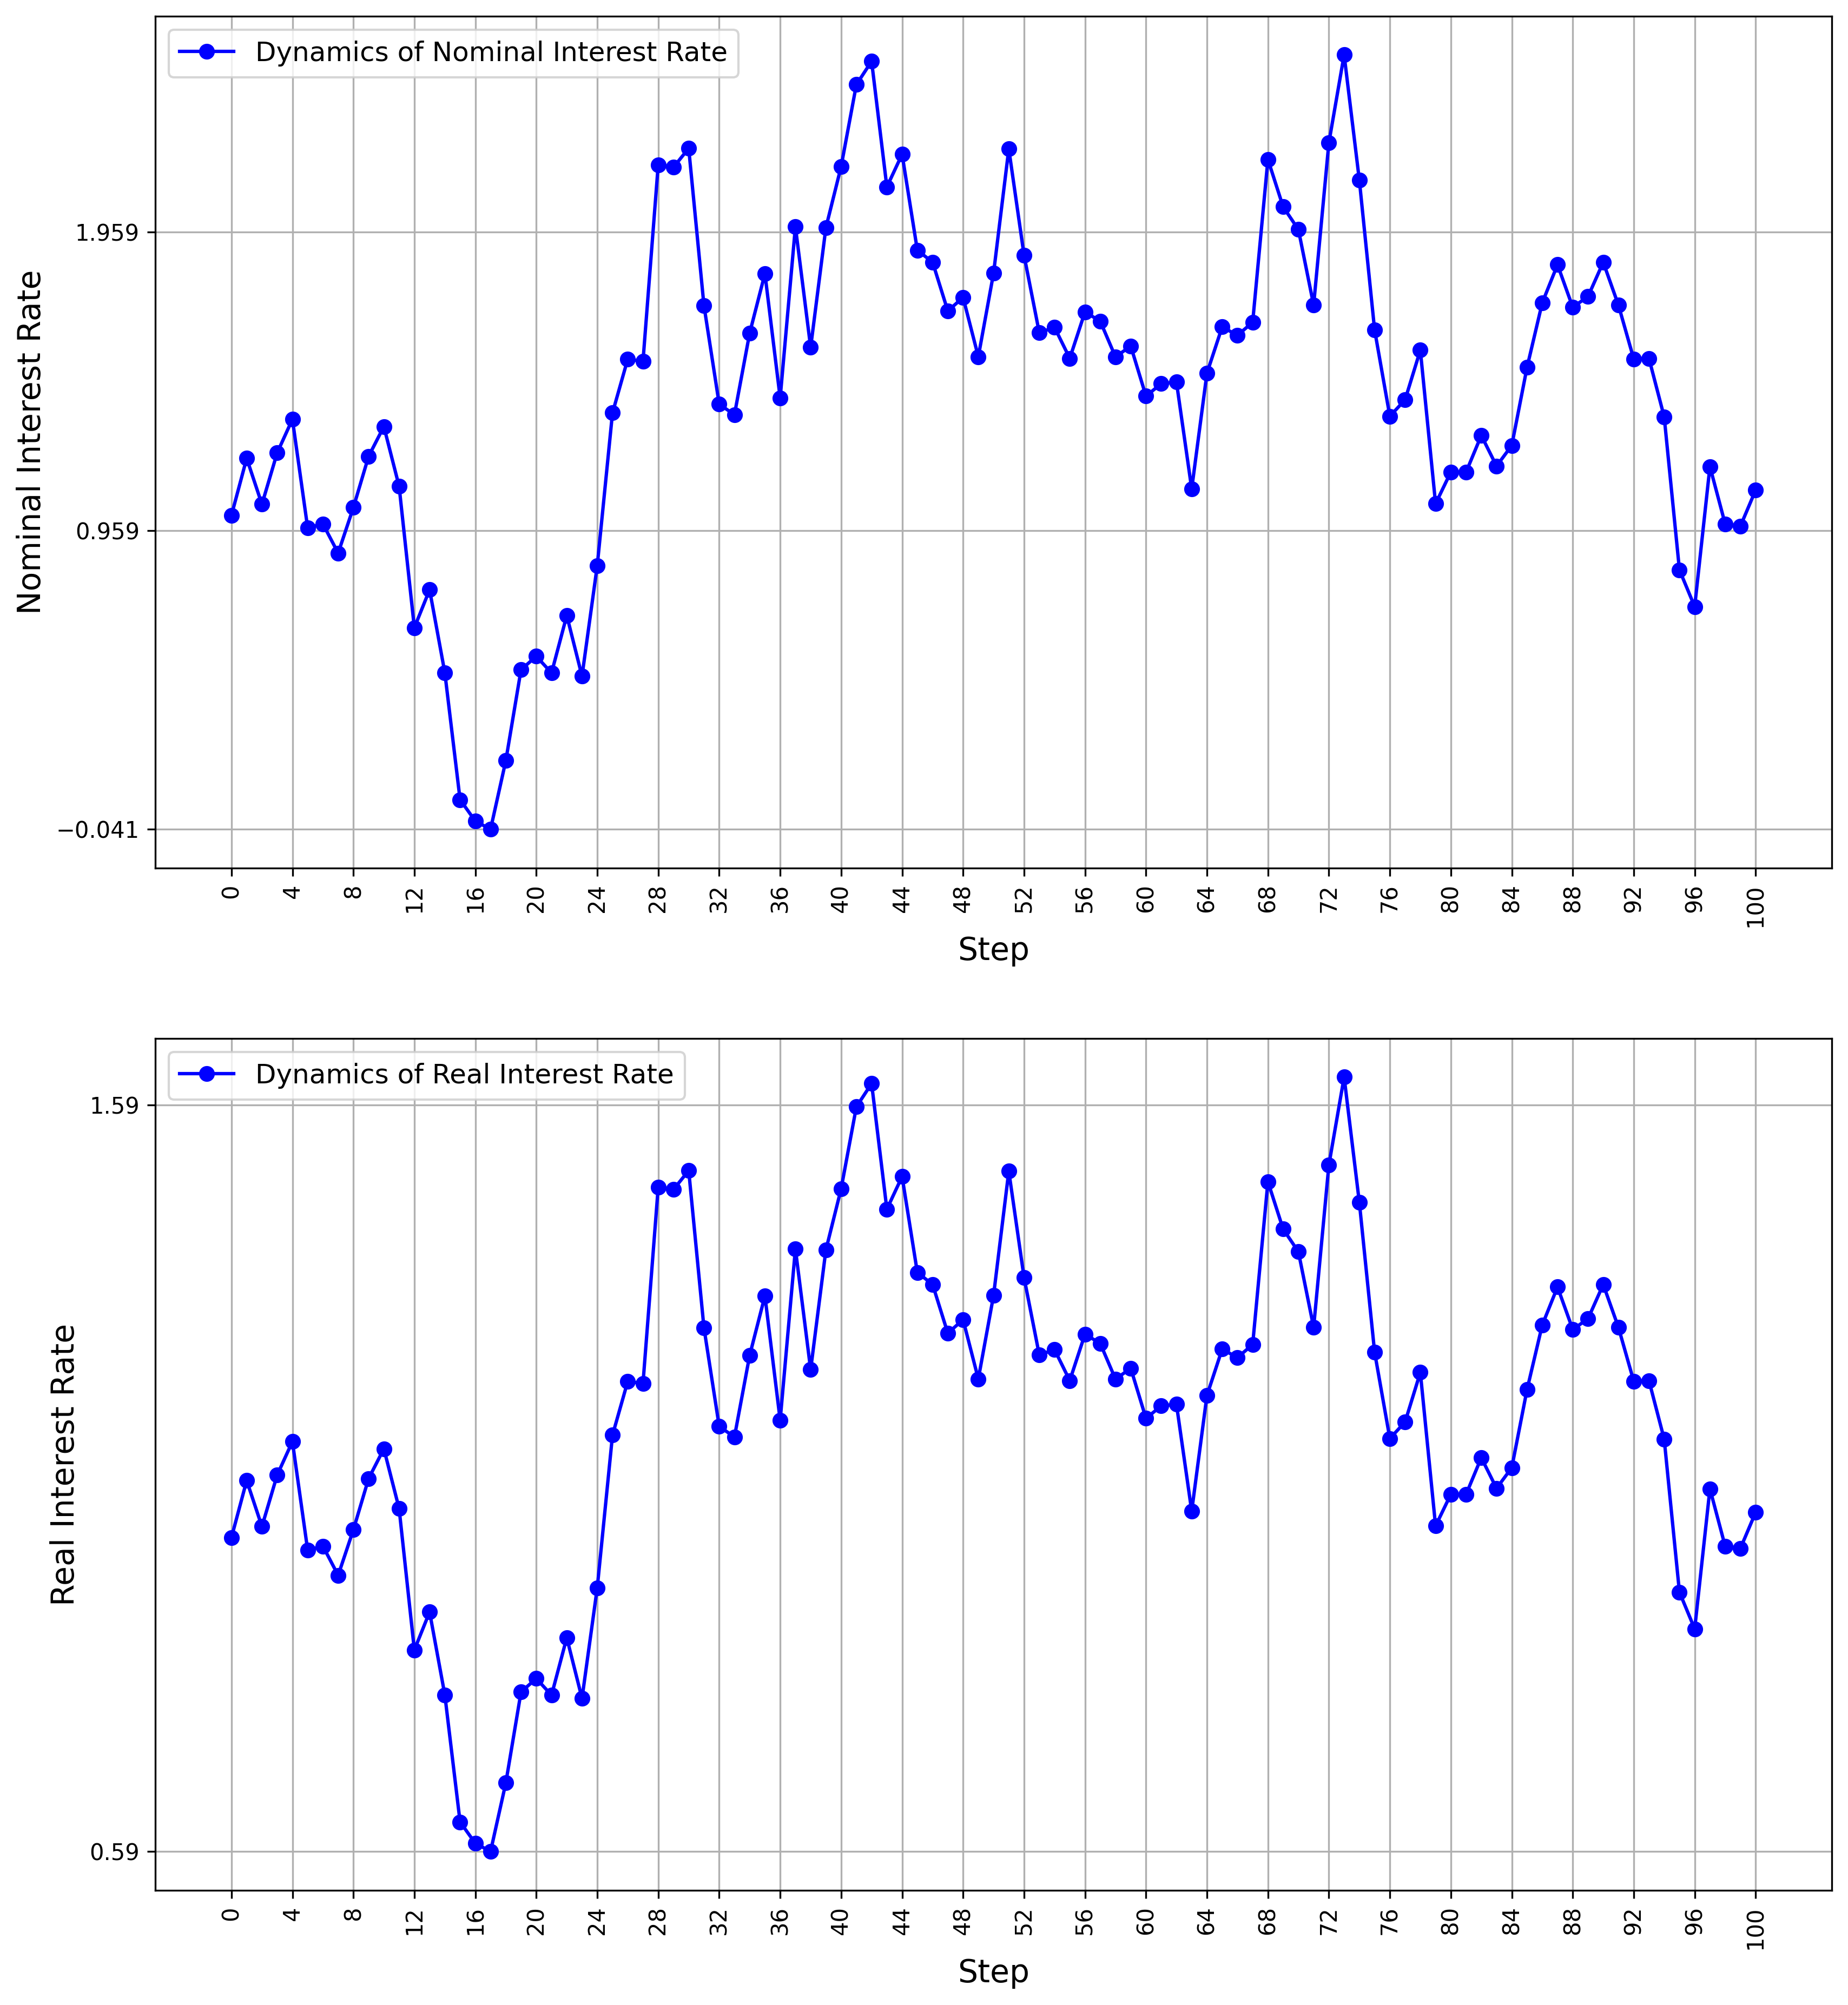

In [10]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Nominal Interest Rate", "Real Interest Rate"]

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(13.33, 7.5 * len(columns)), dpi=300)

for idx, column in enumerate(columns):
    
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)

## Looks Good To Me

In [11]:
from lib.plots import plot_rewards

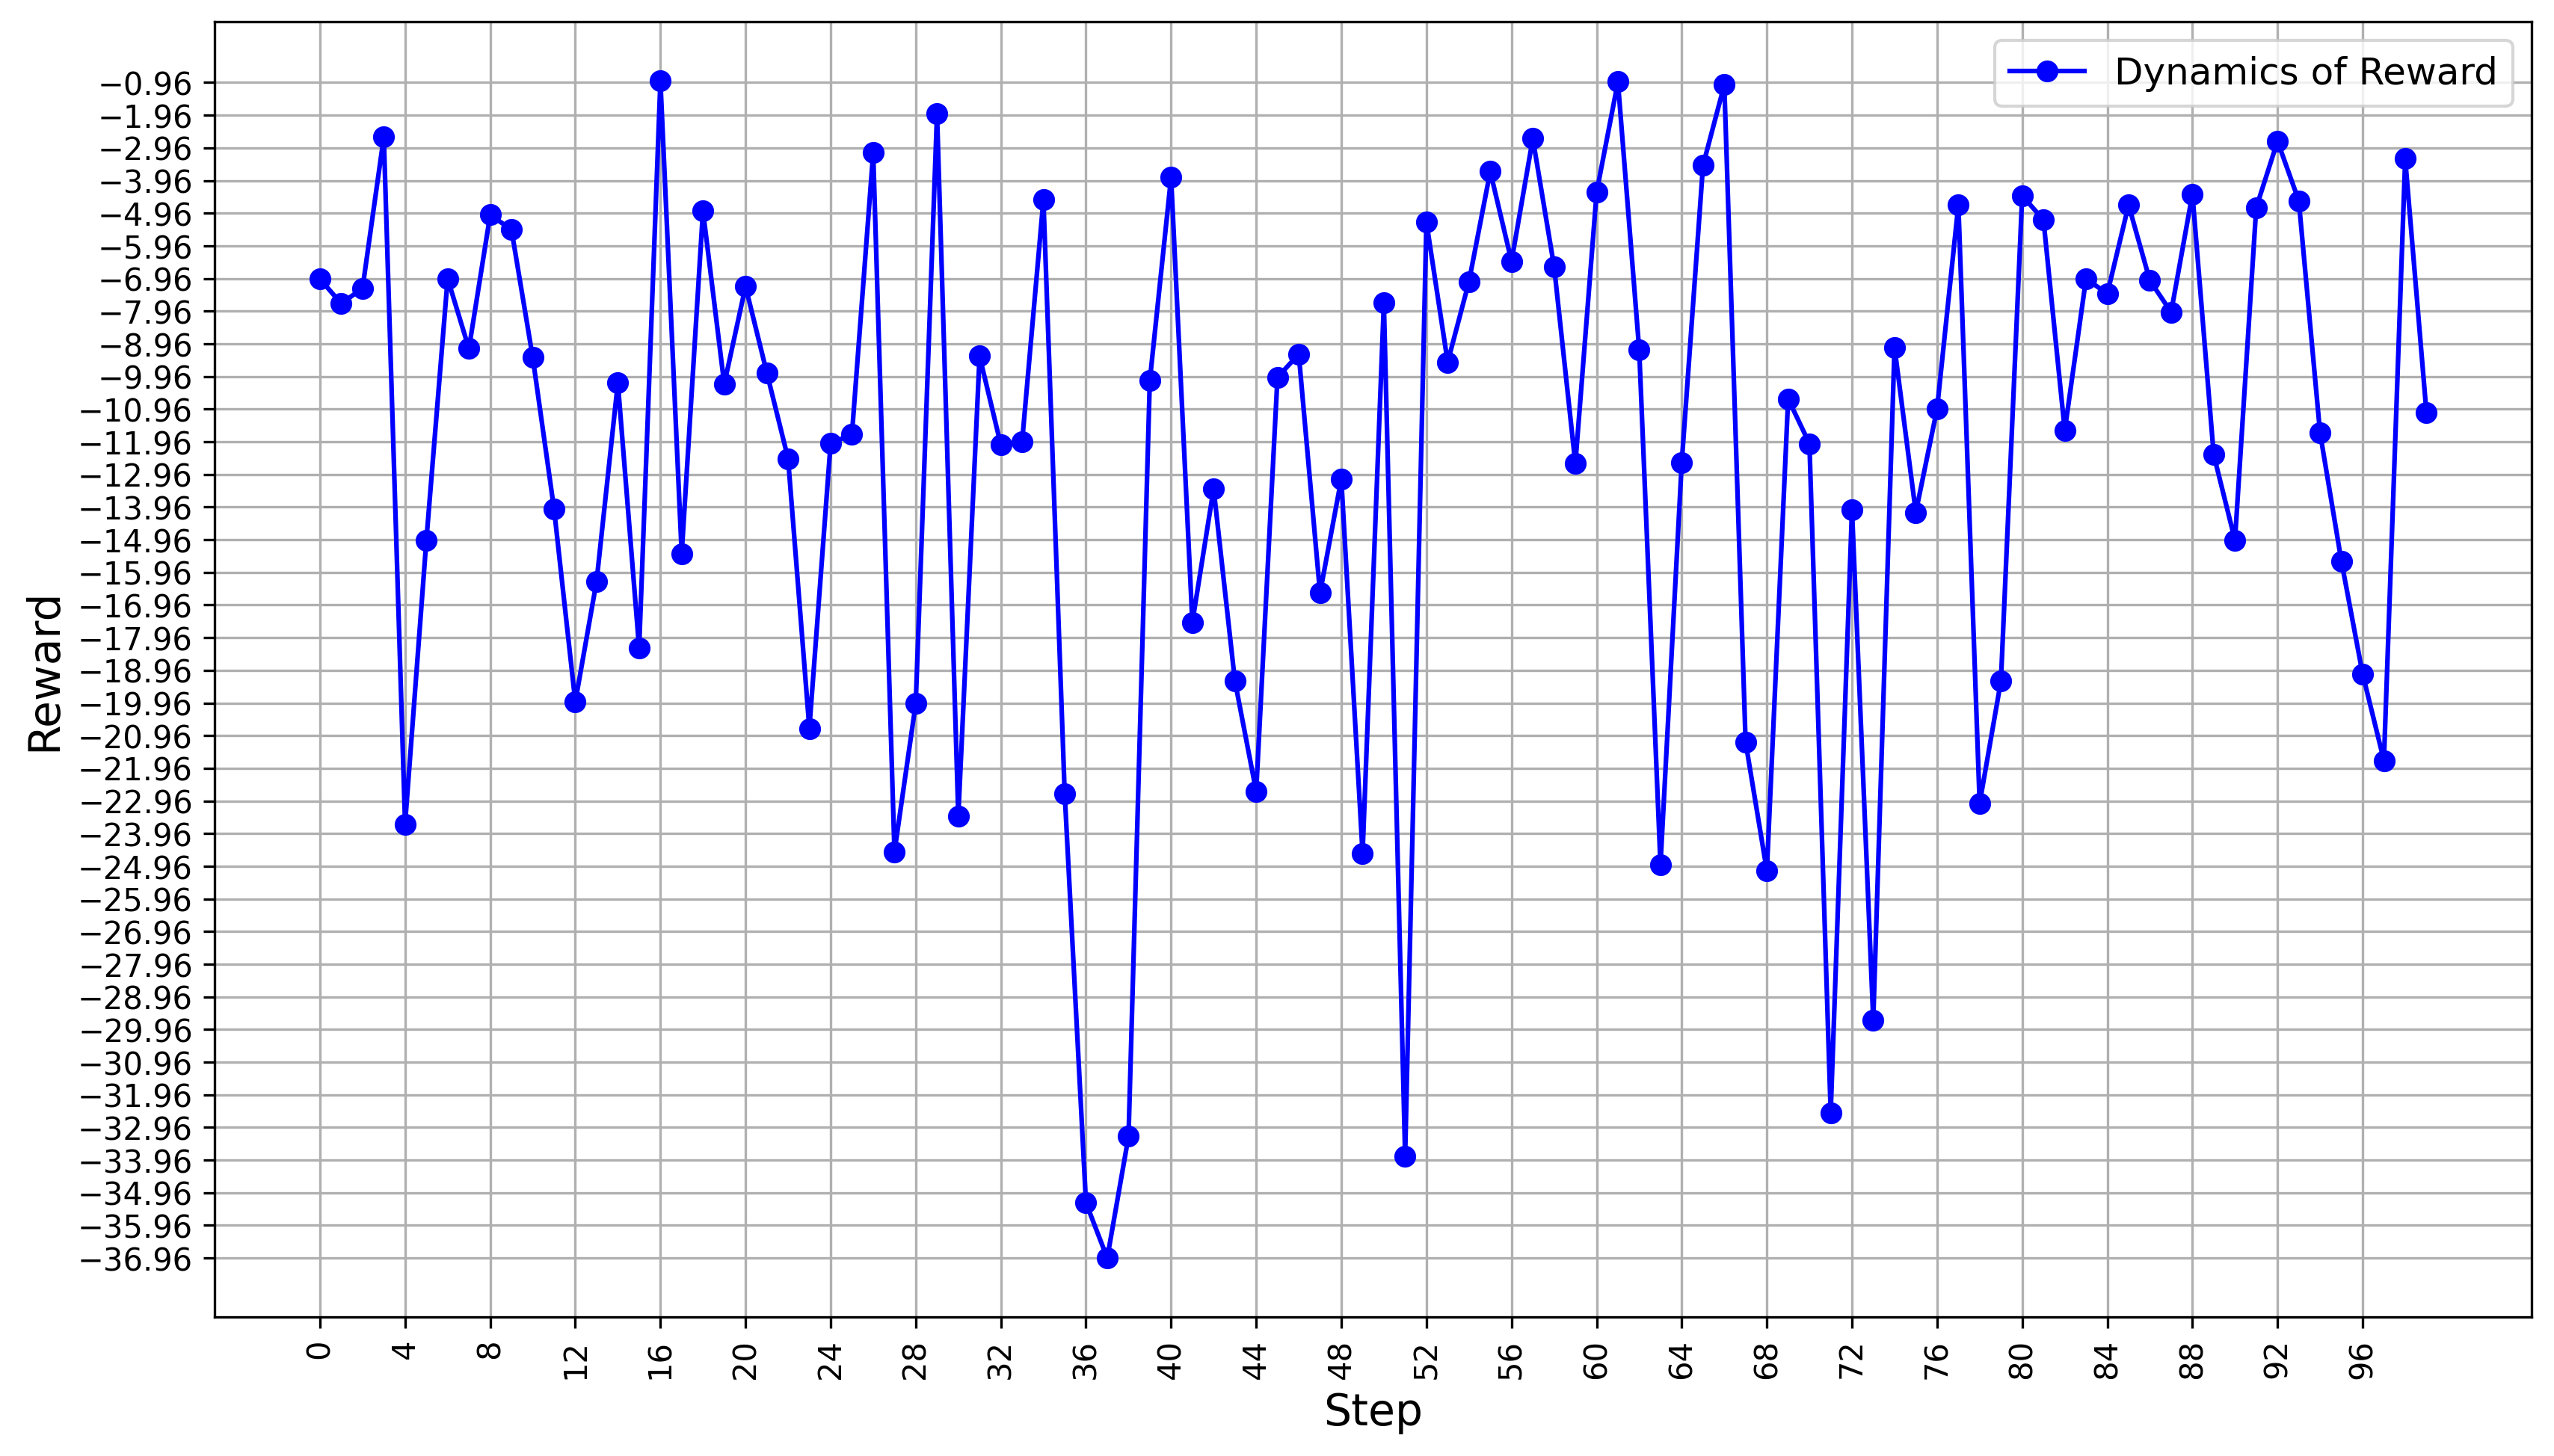

In [12]:
plot_rewards(transitions)